In [3]:
'''we are doing project on us credict card dataset '''

'we are doing project on us credict card dataset '

# Step 1

# import the reqired libraries

In [185]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
import warnings
from scipy import stats 
import pylab
import scipy
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve

# Step 2

# loadind the data

In [186]:
#loading the  data
df1 =pd.read_csv('creditcard.csv')
df=df1.copy()

# Step 3
# processing _stage

In [187]:
df.head(2)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good


In [188]:
#how many rows and cols
print(f'Number of rows in the data : {df.shape[0]} and Number of columns:{df.shape[1]}')

Number of rows in the data : 150002 and Number of columns:18


In [189]:
# we need to find the information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [190]:
# find null values present or not 
df.isna().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [191]:
df.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [192]:
# we should remove last two rows 
df=df.drop([150000,150001],axis=0)


In [193]:
#before splitting the data check null values
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [194]:
df['NumberOfDependents']=pd.to_numeric(df['NumberOfDependents'])
df['NumberOfDependents'].dtype

dtype('float64')

# Step 4
# feature engineering
# in feature engineering we have four steps is there
* handle the null values 
* convertng the categorical data numerical data
* handling the outliers 
* varable transfomation 
* feature scaling 


In [195]:
# split the data 
x=df.drop(columns='Good_Bad')
y=df['Good_Bad']

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [197]:
len(x_train),len(x_test)

(135000, 15000)

In [198]:
len(y_train),len(y_test)

(135000, 15000)

In [199]:
x_train.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26738
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         26738
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3548
dtype: int64

In [200]:
# we have one duplicate column so we have to remove them 

In [201]:
x_train.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,NaN,3.0,0.0,0.0,0.0,0.0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,3060.0,5.0,0.0,0.0,0.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,15833.0,16.0,0.0,3.0,0.0,1.0
57742,0.0,0.715410,43.0,Male,East,5882.0,Ownhouse,Officer3,Professional,0.0,0.135305,5882.0,11.0,0.0,0.0,0.0,1.0
43651,0.0,0.000000,49.0,Male,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,871.000000,NaN,21.0,0.0,2.0,0.0,4.0
21898,0.0,0.052705,27.0,Male,North,NaN,Rented,Non-officer,Graduate,0.0,2025.000000,NaN,8.0,0.0,2.0,0.0,NaN
66140,0.0,0.001447,50.0,Male,Central,7271.0,Ownhouse,Self_Emp,Professional,1.0,0.582371,7271.0,8.0,0.0,2.0,0.0,0.0


In [202]:
# we have one duplicate column so we are checking here whether it is duplicta or not 

In [203]:
x_train['MonthlyIncome'][135986] == x_train['MonthlyIncome.1'][135986]

False

In [204]:
x_train['MonthlyIncome'][48361] == x_train['MonthlyIncome.1'][48361]

True

In [205]:
np.isnan(x_train['MonthlyIncome'][135986]) == np.isnan(x_train['MonthlyIncome.1'][135986])

True

In [206]:
#since MonthlyIncome and MonthlyIncome.1 columns looks similar so lets compare
c=[]
for  i in x_train.index:
    if np.isnan(x_train['MonthlyIncome'][i]) == np.isnan(x_train['MonthlyIncome.1'][i]):
      pass 
    elif x_train['MonthlyIncome'][i] == x_train['MonthlyIncome.1'][i]:
      pass
    else:
      c.append(i)
if len(c)>0:
   print('not same ')
else:
  print('same')        

same


In [207]:
# now i am droping that column its duplicate column 
x_train = x_train.drop(['MonthlyIncome.1'],axis =1)
x_test = x_test.drop(['MonthlyIncome.1'],axis =1)

In [208]:
x_train.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26738
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3548
dtype: int64

In [209]:
x_test.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2993
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       376
dtype: int64

##  for handling null values we have five techinque is there 
* using mean mode median 
* end of distribution  --->  it means 3rd std value we will fill with 3rd std value 
* arbitory value   --->   it means wherever there is an null vaalue fill with the 999 value
* constnat value ---->  wherever there is an null values fill with 0 and reamaining values replace with the 1
* Random_sample_imputation ---> it means we will take all vlaues wnd replace with wherever there is an null values fill with remaining values randomly


* most of thetime in real time  we will use only the Random sample imputaion 


* so thats why we are usin the random sample imputation 


# So I am using the Random Sample Imputaion


In [210]:
#we are going to apply random_sample_imputation technique on both columns which are having null values
def random_sample(x_train,var):
  x_train[var+"_replaced"] = x_train[var].copy()
  s = x_train[var].dropna().sample(x_train[var].isnull().sum() , random_state = 42)
  s.index = x_train[x_train[var].isnull()].index
  x_train.loc[x_train[var].isnull() , var+'_replaced'] = s

In [212]:
col = ['MonthlyIncome','NumberOfDependents']
for j in col:
  random_sample(x_train,j)

In [213]:
x_train.head(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_replaced,NumberOfDependents_replaced
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,3.0,0.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,5.0,0.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,16.0,0.0,3.0,0.0,1.0,15833.0,1.0


In [214]:
x_train.isna().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26738
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3548
MonthlyIncome_replaced                      0
NumberOfDependents_replaced                 0
dtype: int64

std of MonthlyIncome Feature:14754.418707271214
std of MonthlyIncome_replaced Feature:13745.249004808114

std of NumberOfDependents Feature:1.1146446970537602
std of NumberOfDependents_replaced Feature:1.1147328999306885


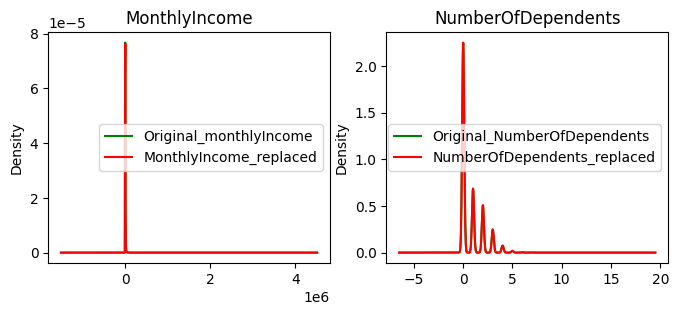

In [31]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('MonthlyIncome')
x_train['MonthlyIncome'].plot(kind='kde',color='g',label='Original_monthlyIncome')
x_train['MonthlyIncome_replaced'].plot(kind='kde',color='r',label='MonthlyIncome_replaced')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.title('NumberOfDependents')
x_train['NumberOfDependents'].plot(kind='kde',color='g',label='Original_NumberOfDependents')
x_train['NumberOfDependents_replaced'].plot(kind='kde',color='r',label='NumberOfDependents_replaced')
plt.legend(loc=0)
print(f'std of MonthlyIncome Feature:{x_train["MonthlyIncome"].std()}')
print(f'std of MonthlyIncome_replaced Feature:{x_train["MonthlyIncome_replaced"].std()}')
print()
print(f'std of NumberOfDependents Feature:{x_train["NumberOfDependents"].std()}')
print(f'std of NumberOfDependents_replaced Feature:{x_train["NumberOfDependents_replaced"].std()}')
plt.show()

In [32]:
#same process repeat on theX_test null value columns
x_train.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26738
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3548
MonthlyIncome_replaced                      0
NumberOfDependents_replaced                 0
dtype: int64

In [33]:
x_test.isna().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2993
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       376
dtype: int64

In [34]:
#we are going to apply random_sample_imputation technique on both columns which are having null values
def random_sample(x_test,var):
  x_test[var+"_replaced"] = x_test[var].copy()
  s = x_test[var].dropna().sample(x_test[var].isnull().sum(), random_state = 42)
  s.index = x_test[x_test[var].isnull()].index
  x_test.loc[x_test[var].isnull() , var+'_replaced'] = s

In [35]:
col = ['MonthlyIncome','NumberOfDependents']
for j in col:
  random_sample(x_test,j)

In [36]:
x_test.head(7)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_replaced,NumberOfDependents_replaced
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,7667.0,0.0
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,7750.0,0.0
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,6000.0,3.0
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0.0,4958.0,0.0
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0.0,7480.0,0.0
96370,0.0,0.003231,79.0,Female,Central,NaN,Ownhouse,Non-officer,Graduate,0.0,5.000000,6.0,0.0,0.0,0.0,0.0,3466.0,0.0
49742,0.0,0.124479,48.0,Female,East,13686.0,Rented,Self_Emp,Post-Grad,0.0,0.610872,14.0,0.0,2.0,0.0,1.0,13686.0,1.0


In [37]:
x_test.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2993
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       376
MonthlyIncome_replaced                     0
NumberOfDependents_replaced                0
dtype: int64

std of MonthlyIncome Feature:10477.737242089834
std of MonthlyIncome_replaced Feature:9668.67572554706

std of NumberOfDependents Feature:1.1188864462304973
std of NumberOfDependents_replaced Feature:1.1207439929825724


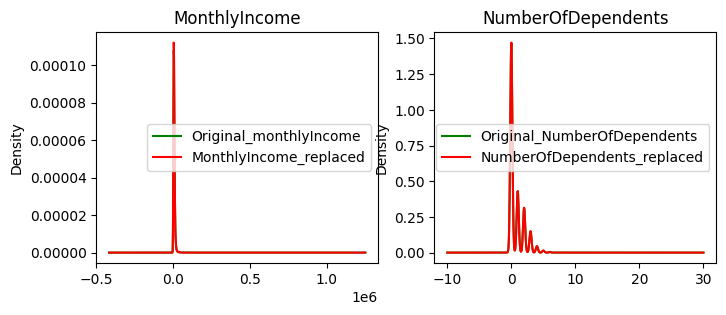

In [38]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('MonthlyIncome')
x_test['MonthlyIncome'].plot(kind='kde',color='g',label='Original_monthlyIncome')
x_test['MonthlyIncome_replaced'].plot(kind='kde',color='r',label='MonthlyIncome_replaced')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.title('NumberOfDependents')
x_test['NumberOfDependents'].plot(kind='kde',color='g',label='Original_NumberOfDependents')
x_test['NumberOfDependents_replaced'].plot(kind='kde',color='r',label='NumberOfDependents_replaced')
plt.legend(loc=0)
print(f'std of MonthlyIncome Feature:{x_test["MonthlyIncome"].std()}')
print(f'std of MonthlyIncome_replaced Feature:{x_test["MonthlyIncome_replaced"].std()}')
print()
print(f'std of NumberOfDependents Feature:{x_test["NumberOfDependents"].std()}')
print(f'std of NumberOfDependents_replaced Feature:{x_test["NumberOfDependents_replaced"].std()}')
plt.show()

In [39]:
#since null values cleared we can remove original features because proper data was maintained in another feature
x_train = x_train.drop(['MonthlyIncome','NumberOfDependents'],axis =1)
x_test = x_test.drop(['MonthlyIncome','NumberOfDependents'],axis=1)

In [40]:
x_train.isna().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
MonthlyIncome_replaced                  0
NumberOfDependents_replaced             0
dtype: int64

# Convert Categorical_to_Numerical

* basically the categorical data two types 
* 1.nomianal data ----->    it means for eaxaple there is no priotity wise 
* 2.ordinal data  -----> it means for it should consider the proiority wise and order 
* example low medium and high 3 clases will be there it will githe the order like low=0,medium=1,high=2 

In [41]:
#From the X_train and X_test seperate Numerical features and categorical features
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135000 entries, 135986 to 121958
Data columns (total 16 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            135000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  135000 non-null  float64
 2   age                                   135000 non-null  float64
 3   Gender                                135000 non-null  object 
 4   Region                                135000 non-null  object 
 5   Rented_OwnHouse                       135000 non-null  object 
 6   Occupation                            135000 non-null  object 
 7   Education                             135000 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  135000 non-null  float64
 9   DebtRatio                             135000 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       135000 non-null  float64
 11  

* we sre splittin the data like, 
* x_train_num_cols,   
* x_train_cat_cols,  
*  x_test_num_cols   and    x_test_cat_cols

In [42]:
x_train_num_cols = x_train.select_dtypes(exclude='object')
x_train_cat_cols = x_train.select_dtypes(include='object')
x_test_num_cols = x_test.select_dtypes(exclude='object')
x_test_cat_cols = x_test.select_dtypes(include='object')

In [43]:
x_train_cat_cols

,Gender,Region,Rented_OwnHouse,Occupation,Education
135986,Male,West,Rented,Self_Emp,Professional
48361,Female,East,Rented,Officer1,Post-Grad
146561,Male,South,Ownhouse,Self_Emp,Professional
57742,Male,East,Ownhouse,Officer3,Professional
43651,Male,North,Ownhouse,Self_Emp,Post-Grad
...,...,...,...,...,...
119879,Male,West,Ownhouse,Self_Emp,Graduate
103694,Male,West,Ownhouse,Self_Emp,PhD
131932,Male,East,Rented,Officer1,Professional
146867,Male,South,Rented,Self_Emp,Professional


In [44]:
x_train_num_cols

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_replaced,NumberOfDependents_replaced
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,8293.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,8137.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.003175,44.0,0.0,0.367863,7.0,1.0,2.0,0.0,10000.0,3.0
103694,0.0,0.087697,67.0,1.0,1781.000000,10.0,0.0,1.0,0.0,7400.0,1.0
131932,0.0,0.068788,49.0,0.0,0.673331,8.0,0.0,2.0,0.0,2800.0,0.0
146867,0.0,0.219630,36.0,0.0,0.025316,2.0,0.0,0.0,0.0,1500.0,0.0


In [45]:
#converting X_train_cat_cols to numbers and same we need to apply on X_test_cat_cols
x_train_cat_cols.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
135986,Male,West,Rented,Self_Emp,Professional
48361,Female,East,Rented,Officer1,Post-Grad
146561,Male,South,Ownhouse,Self_Emp,Professional
57742,Male,East,Ownhouse,Officer3,Professional
43651,Male,North,Ownhouse,Self_Emp,Post-Grad


In [46]:
x_train_cat_cols.reset_index(drop=True,inplace=True)

* the categorical data is three types
* 

In [47]:
#gender and regoin comes under nominal part
#rented,occupation,education are odinal part

In [48]:
f=pd.get_dummies(x_train_cat_cols[['Gender',"Region"]],dtype=int)
f

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0
2,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
134995,0,1,0,0,0,0,1
134996,0,1,0,0,0,0,1
134997,0,1,0,1,0,0,0
134998,0,1,0,0,0,1,0


In [49]:
# from sklearn.preprocessing import OneHotEncoder
# one_hot = OneHotEncoder(handle_unknown= 'ignore')
# one_hot.fit(X_train_cat_cols[['Gender','Region']])
# f=one_hot.transform(X_train_cat_cols[['Gender','Region']]).toarray()
# v=pd.DataFrame(data=f)
# v.columns = one_hot.get_feature_names_out()

In [50]:
# X_train_cat_cols = pd.concat([X_train_cat_cols,v],axis=1,)
# X_train_cat_cols

In [51]:
x_train_cat_cols = pd.concat([x_train_cat_cols,f],axis=1,)
x_train_cat_cols

,Gender,Region,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,Male,West,Rented,Self_Emp,Professional,0,1,0,0,0,0,1
1,Female,East,Rented,Officer1,Post-Grad,1,0,0,1,0,0,0
2,Male,South,Ownhouse,Self_Emp,Professional,0,1,0,0,0,1,0
3,Male,East,Ownhouse,Officer3,Professional,0,1,0,1,0,0,0
4,Male,North,Ownhouse,Self_Emp,Post-Grad,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
134995,Male,West,Ownhouse,Self_Emp,Graduate,0,1,0,0,0,0,1
134996,Male,West,Ownhouse,Self_Emp,PhD,0,1,0,0,0,0,1
134997,Male,East,Rented,Officer1,Professional,0,1,0,1,0,0,0
134998,Male,South,Rented,Self_Emp,Professional,0,1,0,0,0,1,0


In [52]:
x_train_cat_cols.isna().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Gender_Female      0
Gender_Male        0
Region_Central     0
Region_East        0
Region_North       0
Region_South       0
Region_West        0
dtype: int64

In [53]:
# we are going to #we are going to use odinal encoding on rented_ownhouse,coocupation and education features
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
ord.fit(x_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])
p=ord.transform(x_train_cat_cols[['Rented_OwnHouse','Occupation','Education']])

f=pd.DataFrame(p)
f.columns=ord.get_feature_names_out()
f


,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,1.0,3.0
2,0.0,4.0,4.0
3,0.0,3.0,4.0
4,0.0,4.0,3.0
...,...,...,...
134995,0.0,4.0,0.0
134996,0.0,4.0,2.0
134997,1.0,1.0,4.0
134998,1.0,4.0,4.0


In [54]:
ord.categories_ #  to see categorical columns

[array(['Ownhouse', 'Rented'], dtype=object),
 array(['Non-officer', 'Officer1', 'Officer2', 'Officer3', 'Self_Emp'],
       dtype=object),
 array(['Graduate', 'Matric', 'PhD', 'Post-Grad', 'Professional'],
       dtype=object)]

In [55]:
f.shape

(135000, 3)

In [56]:
x_train_cat_cols.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'Gender_Female', 'Gender_Male', 'Region_Central', 'Region_East',
       'Region_North', 'Region_South', 'Region_West'],
      dtype='object')

In [57]:
x_train_cat_cols=x_train_cat_cols.drop(columns=['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)

In [58]:
x_train_cat_cols.reset_index(drop=True,inplace=True)

In [59]:
x_train_cat_cols=pd.concat([x_train_cat_cols,f],axis=1)

In [60]:
x_train_cat_cols

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0,1,0,0,0,0,1,1.0,4.0,4.0
1,1,0,0,1,0,0,0,1.0,1.0,3.0
2,0,1,0,0,0,1,0,0.0,4.0,4.0
3,0,1,0,1,0,0,0,0.0,3.0,4.0
4,0,1,0,0,1,0,0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
134995,0,1,0,0,0,0,1,0.0,4.0,0.0
134996,0,1,0,0,0,0,1,0.0,4.0,2.0
134997,0,1,0,1,0,0,0,1.0,1.0,4.0
134998,0,1,0,0,0,1,0,1.0,4.0,4.0


# same things we can assign to test data 

In [61]:
x_test_cat_cols

,Gender,Region,Rented_OwnHouse,Occupation,Education
59770,Male,Central,Rented,Self_Emp,Professional
21362,Female,North,Rented,Officer3,Post-Grad
127324,Female,East,Rented,Officer1,Post-Grad
140509,Male,West,Rented,Non-officer,Professional
144297,Male,West,Rented,Officer2,Professional
...,...,...,...,...,...
90394,Male,Central,Ownhouse,Non-officer,Graduate
53959,Male,East,Rented,Officer3,Professional
124099,Female,East,Rented,Officer1,Post-Grad
7060,Male,South,Ownhouse,Self_Emp,Matric


In [62]:
# # these are the nominal columns Gende, Region we will the technique get dummeis for converting the act to numerical 
# # these are the ordinal columns Rented_OwnHouse, Occupation	and Education we will use converting the cat to numeriacal ordinal encoder 

# nami= pd.get_dummies(x_test_cat_cols[['Gender','Region']],dtype=int)
# nami

In [63]:
# ord.fit(x_test_cat_cols[['Rented_OwnHouse','Occupation','Education']])
# ordi=ord.transform(x_test_cat_cols[['Rented_OwnHouse','Occupation','Education']])
# ord_num=pd.DataFrame(ordi)
# ord_num.columns=ord.get_feature_names_out()
# ord_num

In [64]:
# x_test_cat_cols.columns

In [65]:
# x_test_cat_cols=x_test_cat_cols.drop(columns=['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)

In [66]:
# x_test_cat_cols

In [67]:
# x_test_cat_cols.reset_index(drop=True,inplace=True)

In [68]:
# x_test_cat_cols=pd.concat([nami,ord_num],axis=1)
# x_test_cat_cols

In [69]:
#same things we can assign to test data
from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder()
one_hot.fit(x_test_cat_cols[['Gender','Region']])
p = one_hot.transform(x_test_cat_cols[['Gender','Region']]).toarray()





In [70]:
p_ = pd.DataFrame(data = p)
p_.columns = one_hot.get_feature_names_out()
p_.head()

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
ordi = ord.transform(x_test_cat_cols[['Rented_OwnHouse','Occupation','Education']])
ordi


array([[1., 4., 4.],
       [1., 3., 3.],
       [1., 1., 3.],
       ...,
       [1., 1., 3.],
       [0., 4., 1.],
       [0., 4., 1.]])

In [72]:
ordi_= pd.DataFrame(data=ordi)
ordi_.columns = ord.get_feature_names_out()
ordi_.head()

,Rented_OwnHouse,Occupation,Education
0,1.0,4.0,4.0
1,1.0,3.0,3.0
2,1.0,1.0,3.0
3,1.0,0.0,4.0
4,1.0,2.0,4.0


In [73]:
ordi_.shape

(15000, 3)

In [74]:
x_test_cat_cols.reset_index(drop = True, inplace = True)

In [75]:
#now add p_ and f_
g = pd.concat([p_,ordi_],axis = 1)

In [76]:
x_test_cat_cols=x_test_cat_cols.drop(columns=['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)

In [77]:
x_test_cat_cols=pd.concat([x_test_cat_cols,g],axis=1)

In [78]:
x_test_cat_cols

,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
14995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0
14997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
14998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0


In [79]:
x_train_cat_cols.shape

(135000, 10)

In [80]:
x_test_cat_cols.shape

(15000, 10)

* we are checking here whatever we have numerical columns follwing the normal distribution or not 
* if the numerical columns not follwing the normal distributions we have apply ssome techniques for make hem into follwing noemal distributions 
* log technoque  we havet apply like log(value)
* resiprocal it is not performing -ve vlues and infinty value
* square root  same we have tke sqrt function of value 
* exponential  when we have -ve data it is not performing 
* boxcox **it is quit importent
* yeojohnson Technoque it is also import  
* after applying all techniques we will choose best one
* most of the time we have to the take the log technique 

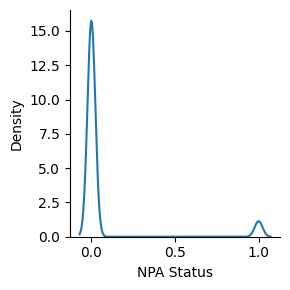

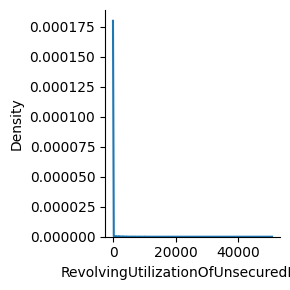

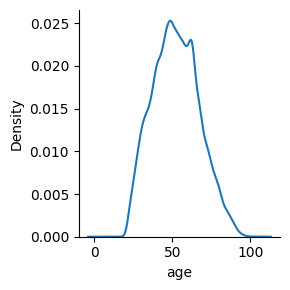

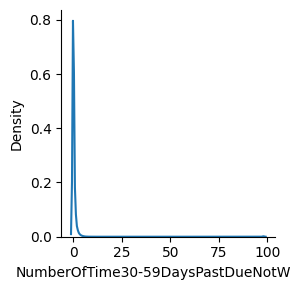

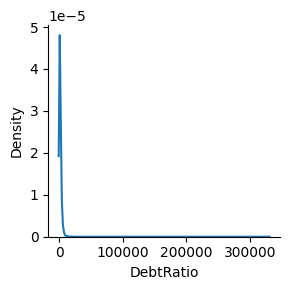

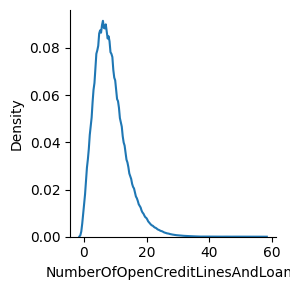

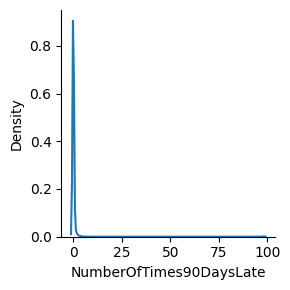

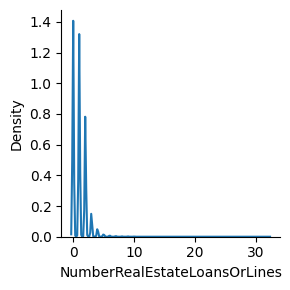

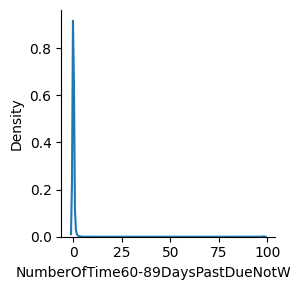

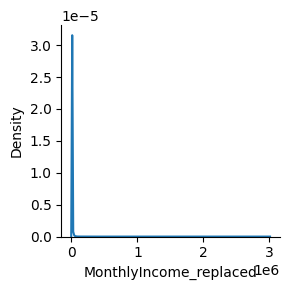

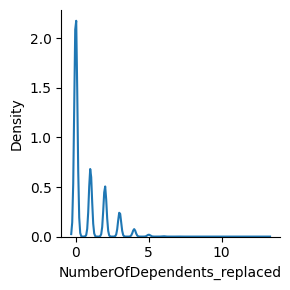

In [81]:
# finding whether the num_clos following normal distributon  or not
for i in x_train_num_cols.columns:
    sns.displot(x_train_num_cols[i], kind='kde', height=3, aspect=1)  # Height sets the vertical size


* before applying the techniques

In [82]:
def fun(data_c,var):
  plt.figure(figsize =(12,3))
  plt.subplot(1,3,1)
  data_c[var].plot(kind='kde')

  plt.subplot(1,3,2)
  sns.boxplot(x=data_c[var])

  plt.subplot(1,3,3)
  stats.probplot(data_c[var],dist = 'norm',plot=plt)
  plt.show()

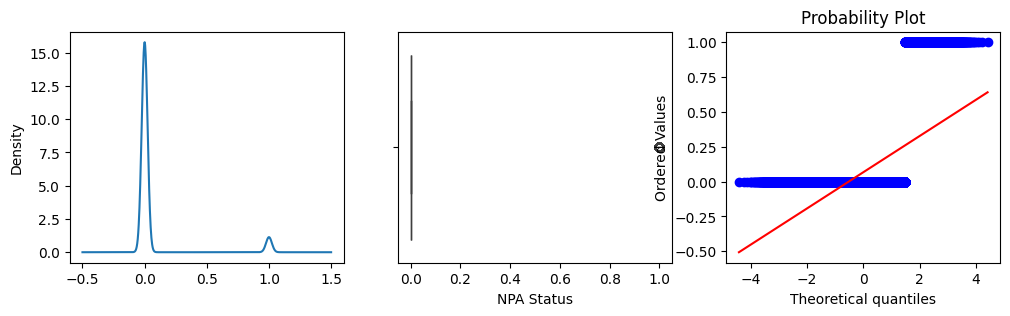

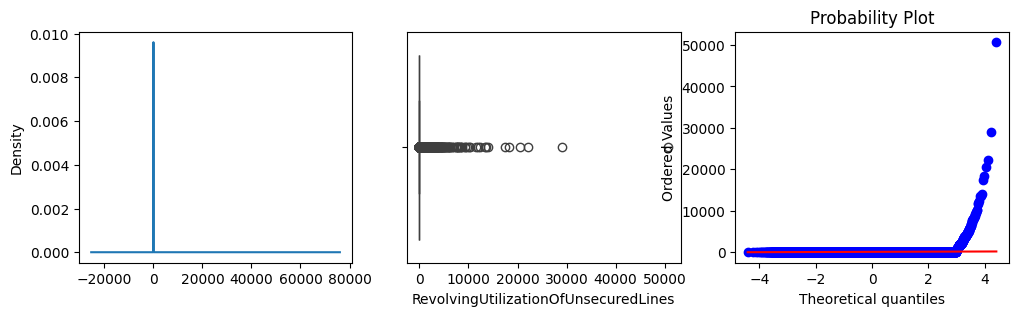

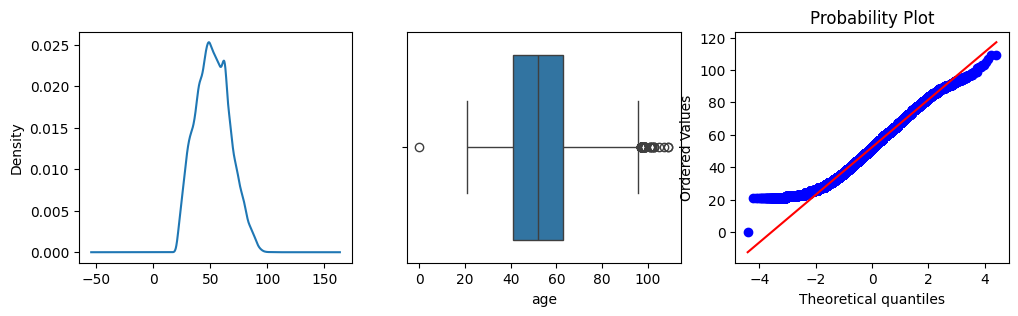

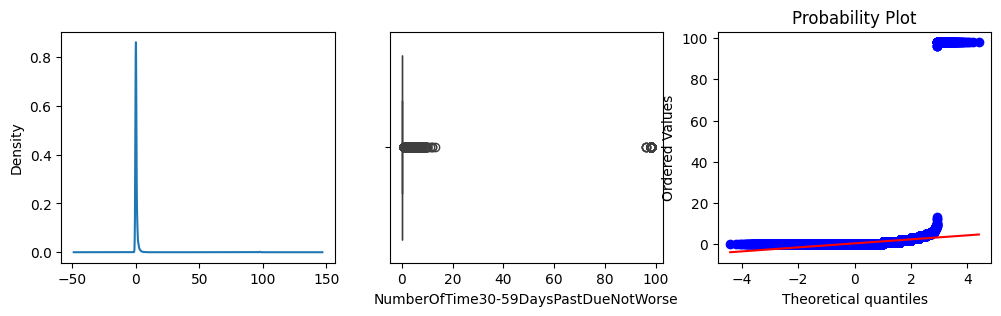

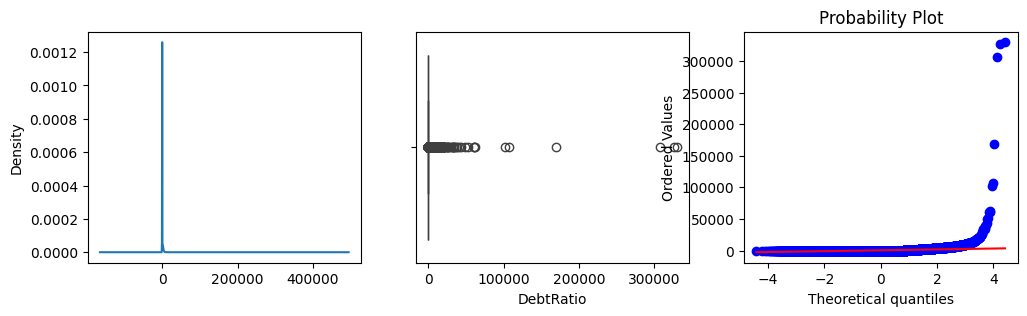

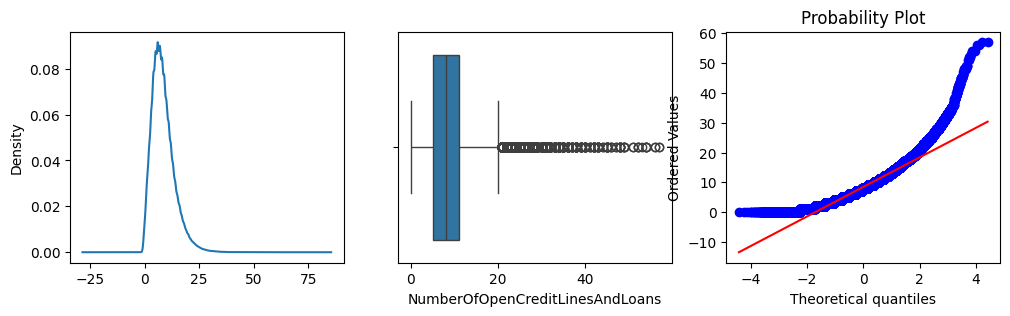

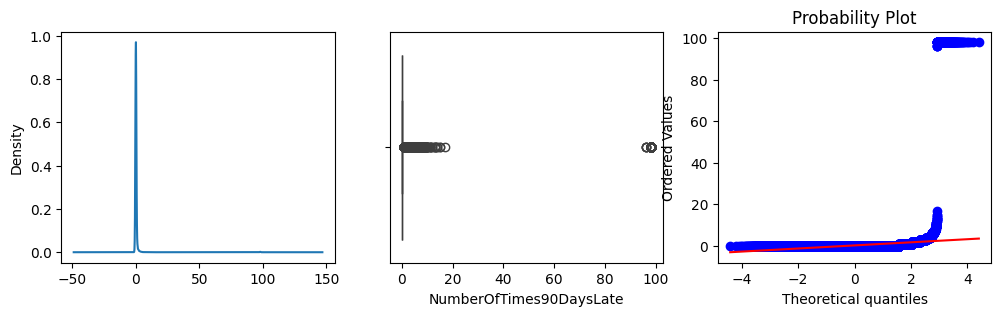

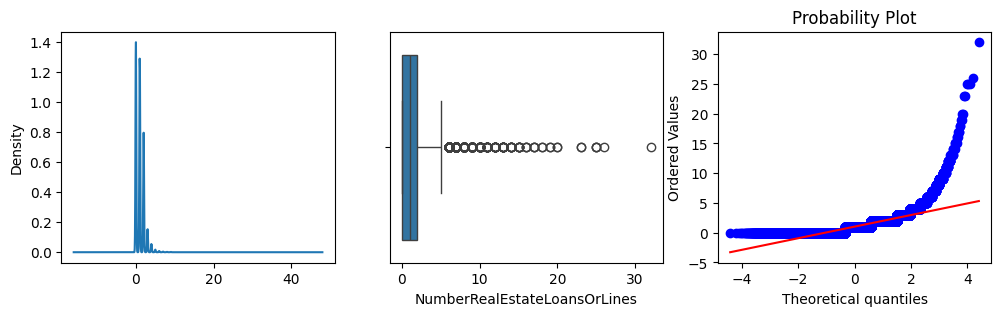

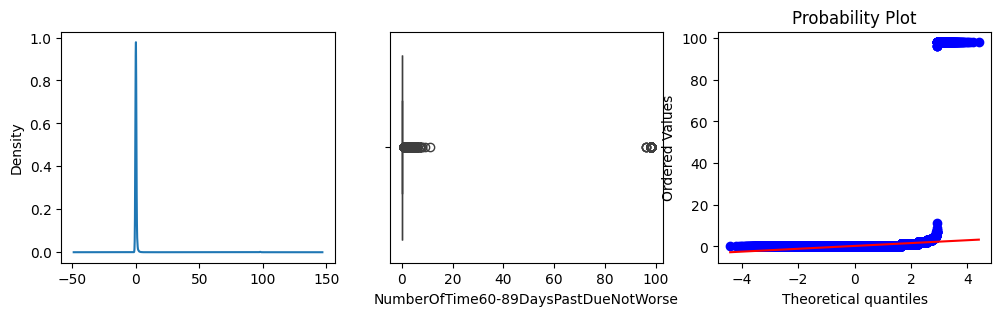

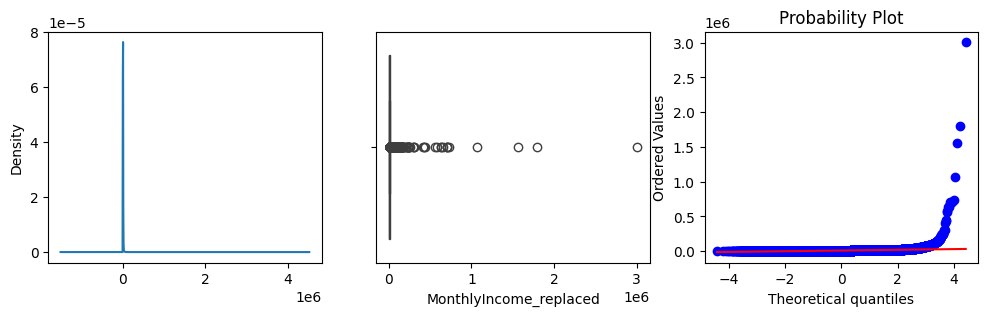

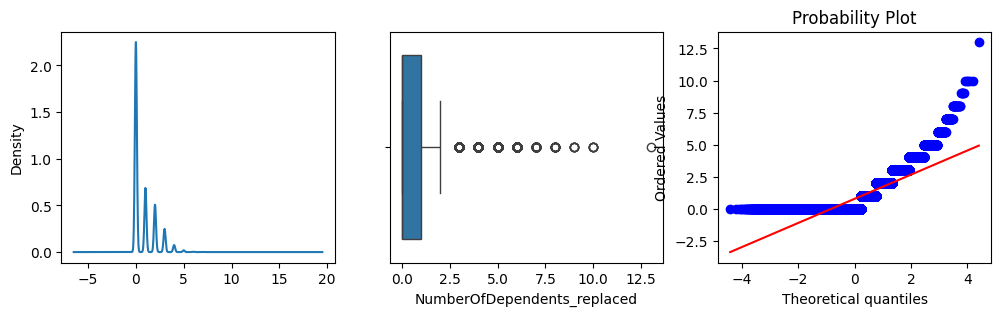

In [83]:
for i in x_train_num_cols.columns:
  fun(x_train_num_cols,i)

In [84]:
#Applying LOG for X_train_num_cols to main normal distribution and reduce the outliers
x_train_num_cols.columns



Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced'],
      dtype='object')

In [85]:
for i in x_train_num_cols.columns:
  x_train_num_cols[i+'_log'] = np.log(x_train_num_cols[i]+1)

In [86]:
x_train_num_cols.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced',
       'NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

* after applying the techniques 
* one more thing here we have o remember ine thing we are doing outliers  here we are redicing the outliers 
* those techniques doing as much as posible decresing outliers 

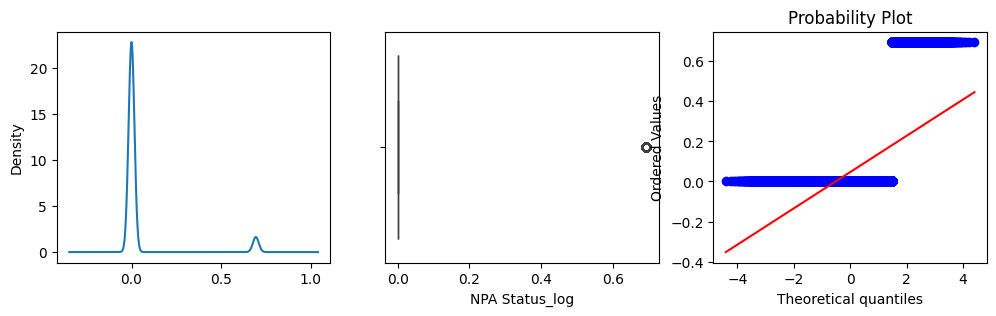

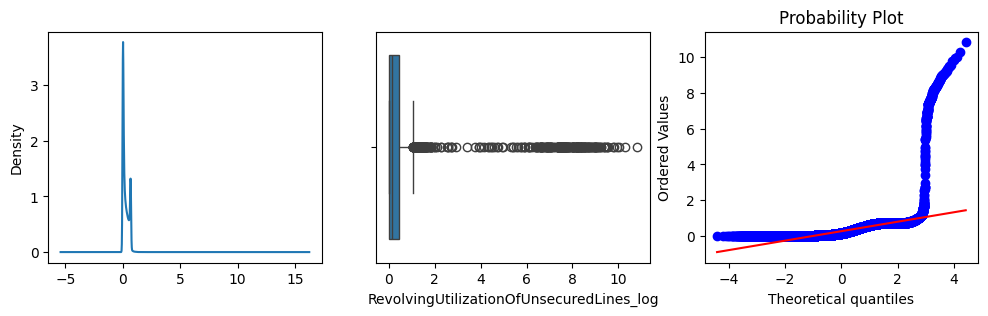

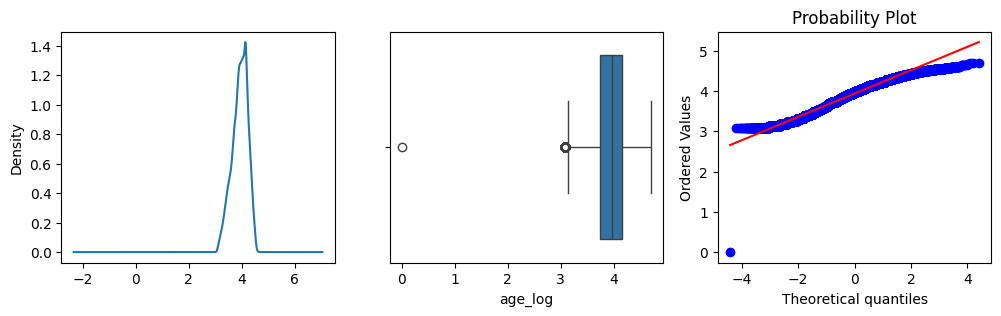

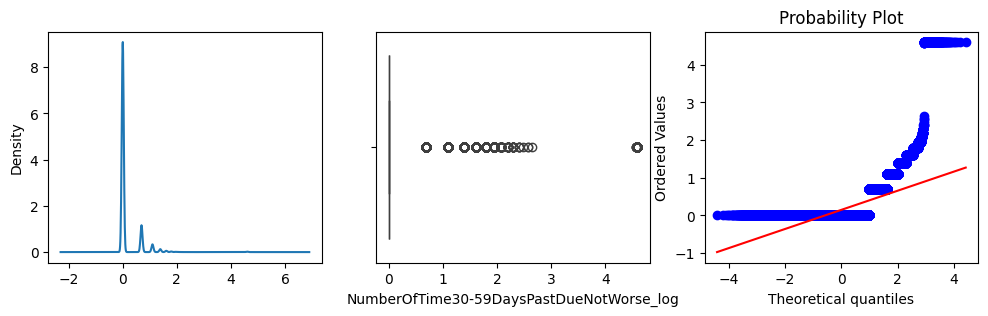

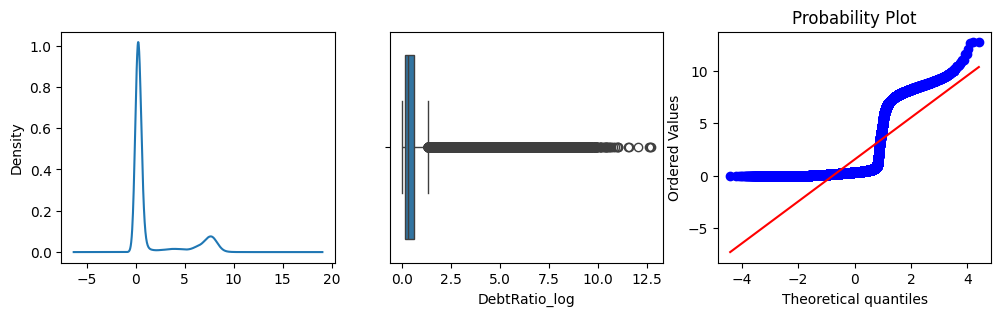

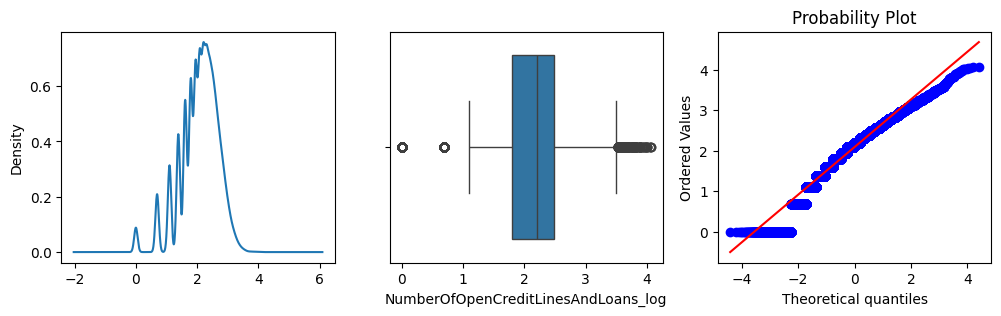

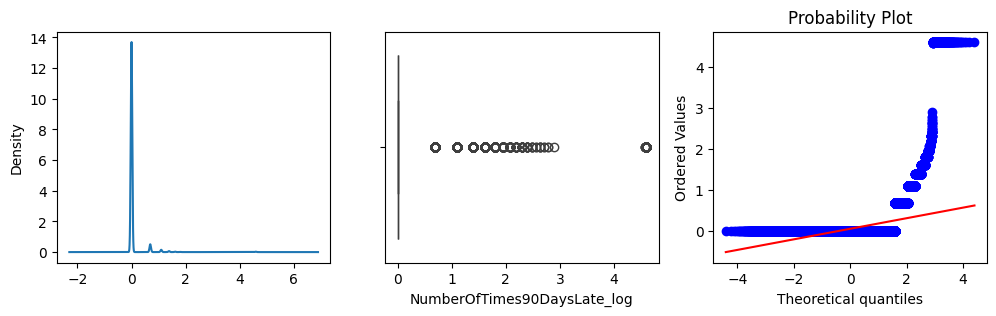

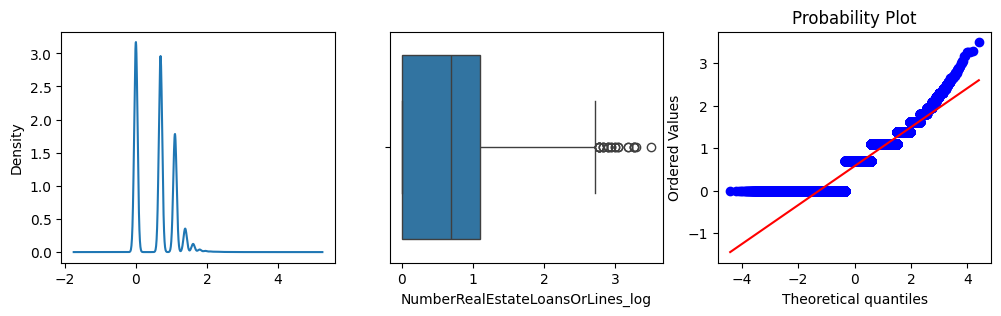

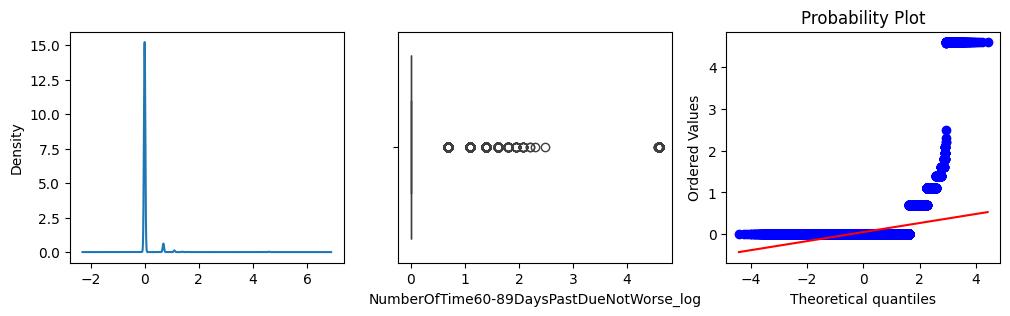

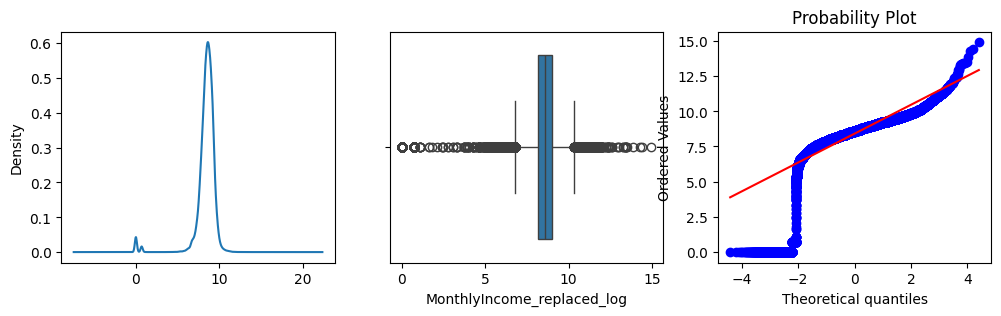

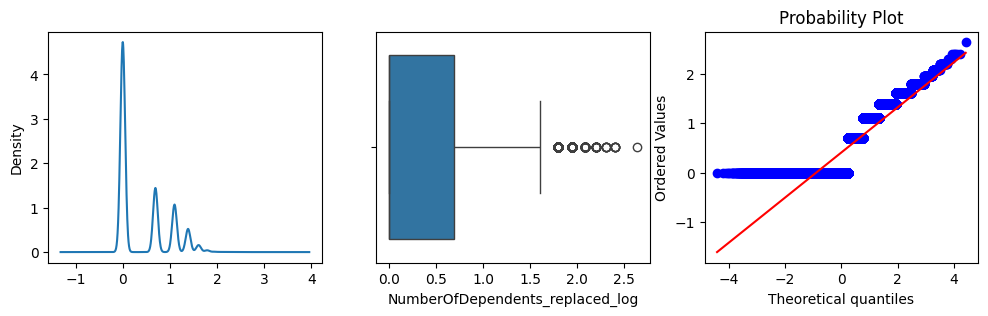

In [87]:
for i in x_train_num_cols.columns:
  if '_log' in i:
    fun(x_train_num_cols,i)

In [88]:
for i in x_train_num_cols.columns:
  if '_log' not in i :
    print(i)


NPA Status
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
MonthlyIncome_replaced
NumberOfDependents_replaced


In [89]:
x_train_num_cols.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced',
       'NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

In [90]:
x_train_num_cols=x_train_num_cols.drop(columns=['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced'],axis=1)

In [91]:
x_train_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

In [92]:
# same log technique we will apply on X_test
for i in x_test_num_cols.columns:
  x_test_num_cols[i+'_log'] = np.log(x_test_num_cols[i] + 1)

In [93]:
x_test_num_cols.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced',
       'NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

In [94]:
x_test_num_cols=x_test_num_cols.drop(columns=['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_replaced', 'NumberOfDependents_replaced'],axis=1)

In [95]:
x_test_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],
      dtype='object')

# Handling outliers

* we have three technique i s there for handling the outliers 
* Trimming --->  here we are using the most os the time trimming techniaue only remening two things we are not going to use ny where
* Capping [lower 3 std value ]
* 5th and 95th quantile 

* for checking we are using boxplot 
* before applying the trimming 

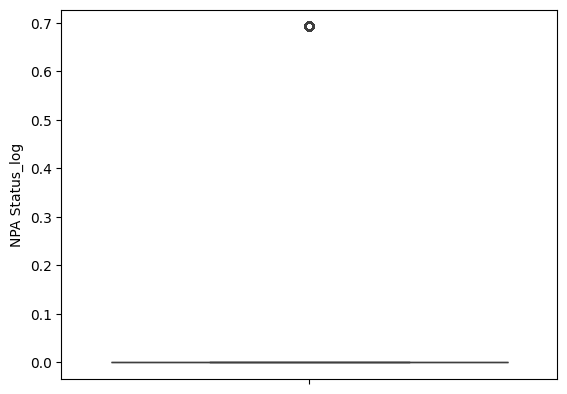

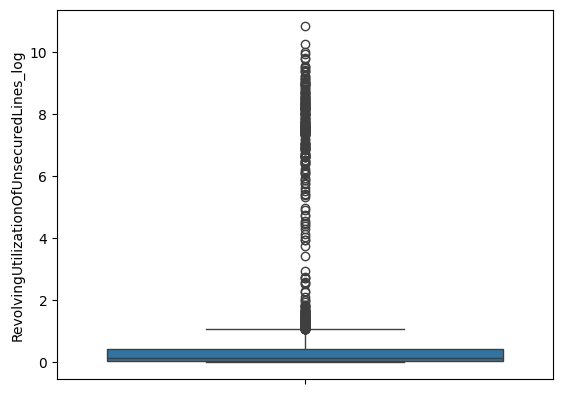

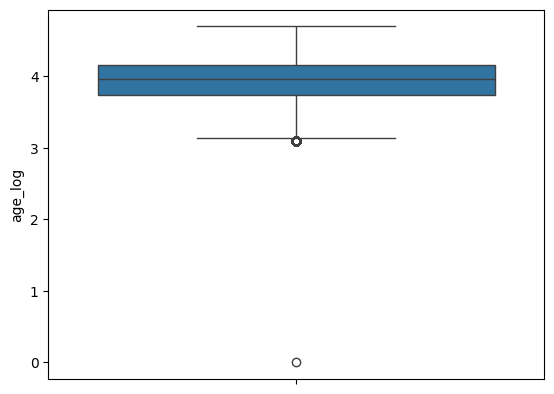

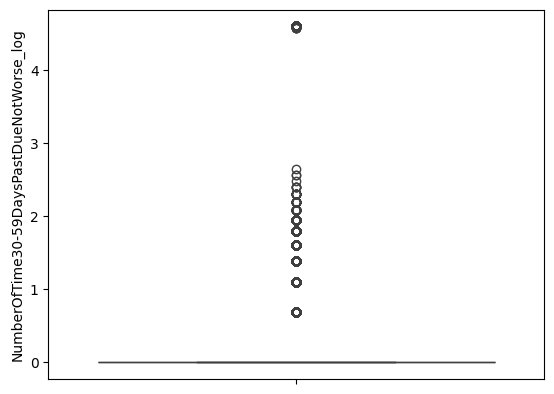

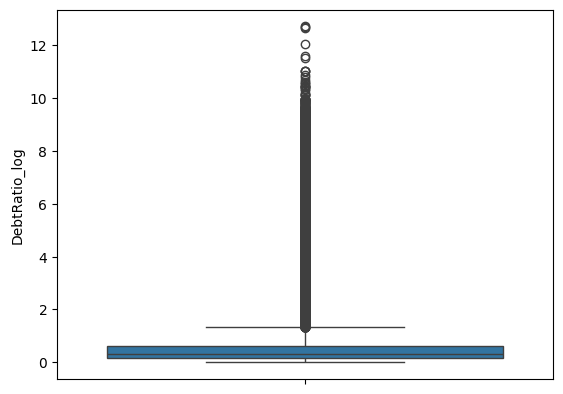

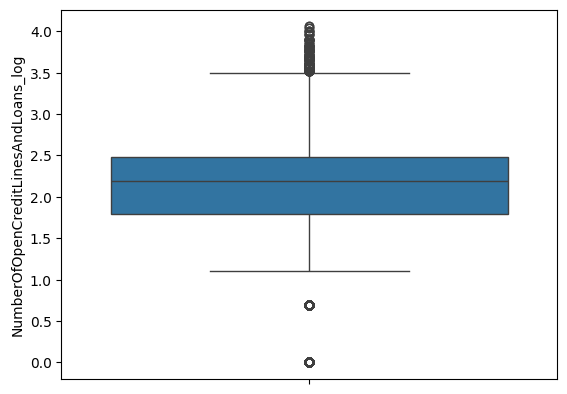

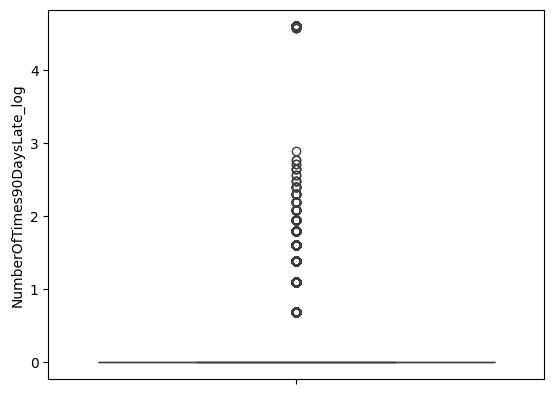

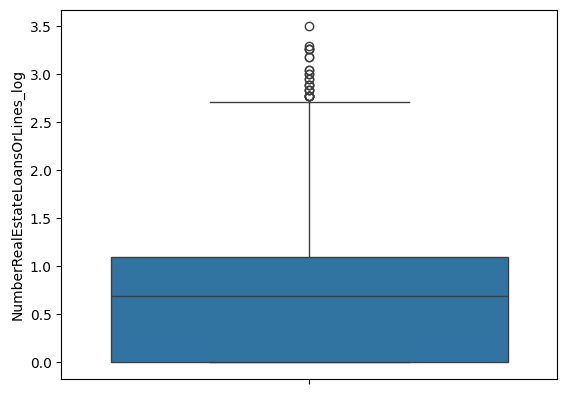

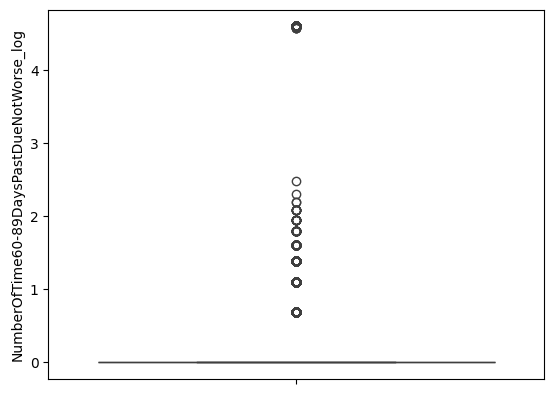

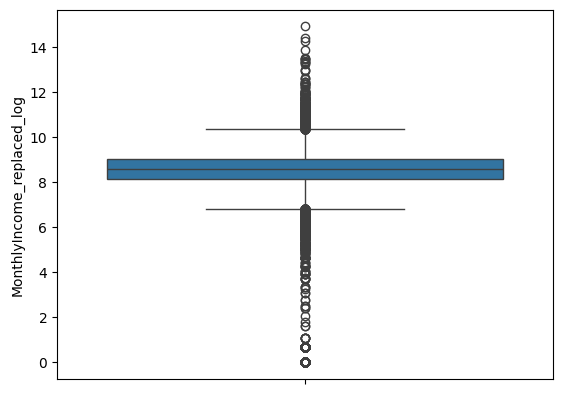

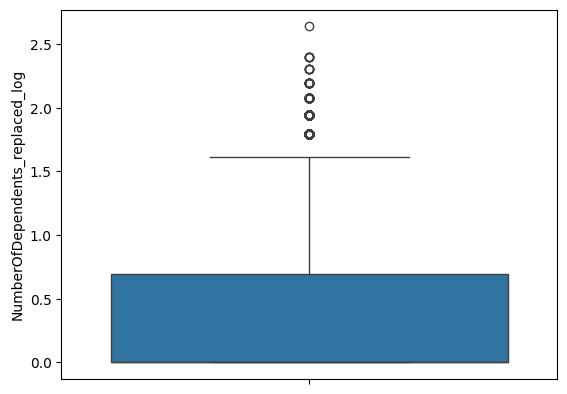

In [96]:
for i in x_train_num_cols.columns:
  sns.boxplot(x_train_num_cols[i])
  plt.show()

In [97]:
def out(col):
    # Calculate Q1, Q3, and IQR
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    # Compute lower and upper bounds
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

# Iterate through numeric columns in x_train_num_cols
for i in x_train_num_cols.select_dtypes(include='number').columns:
    ll, ul = out(x_train_num_cols[i])
    # Apply lower bound and upper bound trimming
    x_train_num_cols[i + '_trimming'] = np.where(
        x_train_num_cols[i] < ll, ll, 
        np.where(x_train_num_cols[i] > ul, ul, x_train_num_cols[i])
    )

In [98]:
def out(col):
    # Calculate Q1, Q3, and IQR
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    # Compute lower and upper bounds
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

# Iterate through numeric columns in x_train_num_cols
for i in x_test_num_cols.select_dtypes(include='number').columns:
    ll, ul = out(x_test_num_cols[i])
    # Apply lower bound and upper bound trimming
    x_test_num_cols[i + '_trimming'] = np.where(
        x_test_num_cols[i] < ll, ll, 
        np.where(x_test_num_cols[i] > ul, ul, x_test_num_cols[i])
    )

In [99]:
x_test_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log',
       'NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [100]:
x_train_num_cols.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log',
       'NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [101]:
x_train_num_cols=x_train_num_cols.drop(columns=['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)

In [102]:
x_test_num_cols=x_test_num_cols.drop(columns=['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log',
       'MonthlyIncome_replaced_log', 'NumberOfDependents_replaced_log'],axis=1)

In [103]:
x_train_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [104]:
x_test_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

* after applying the trimming 


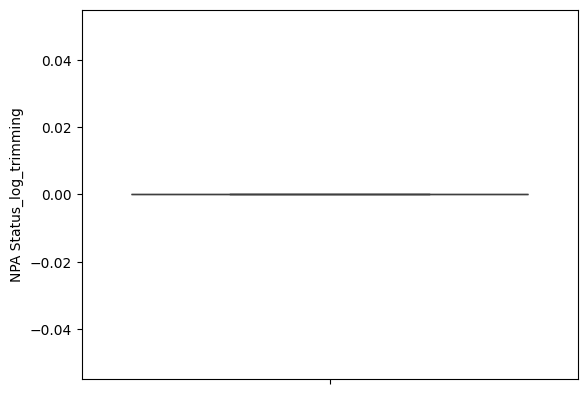

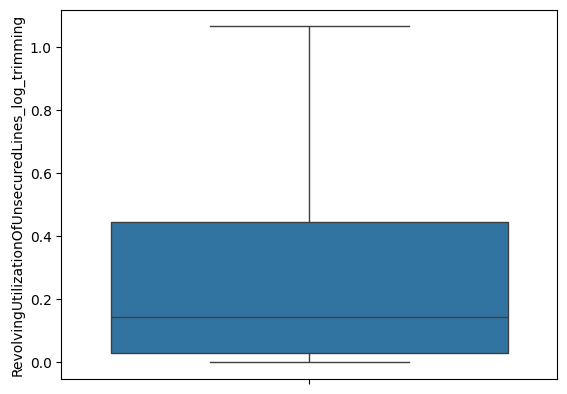

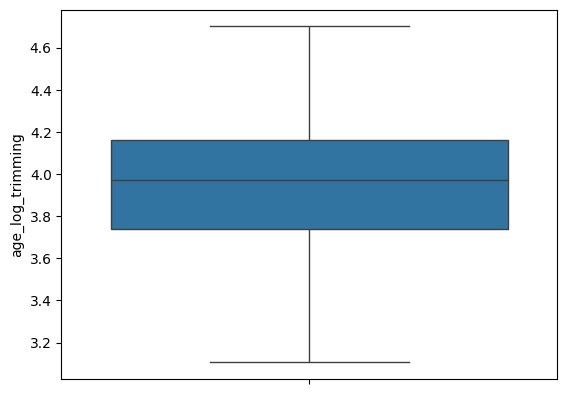

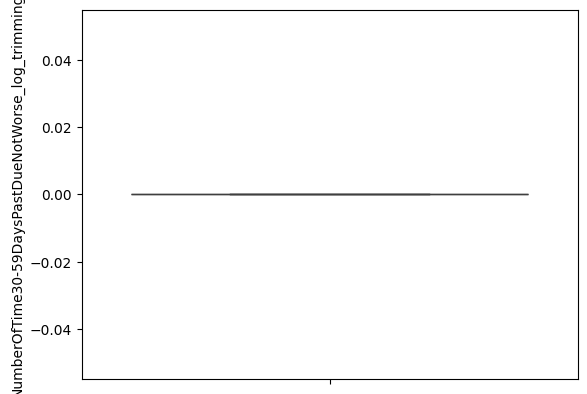

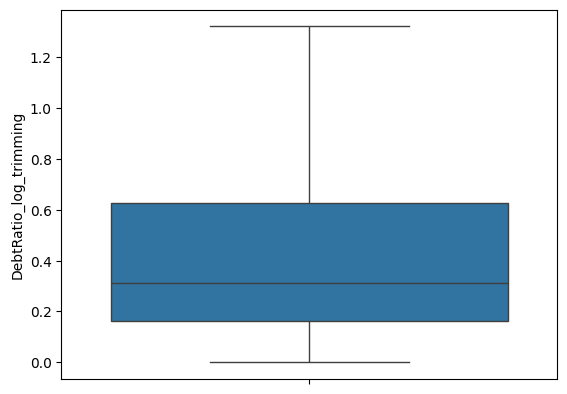

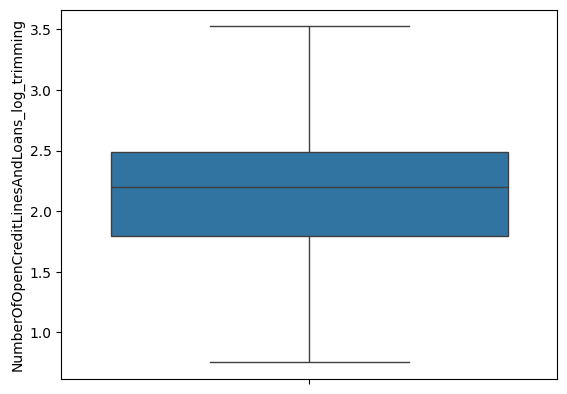

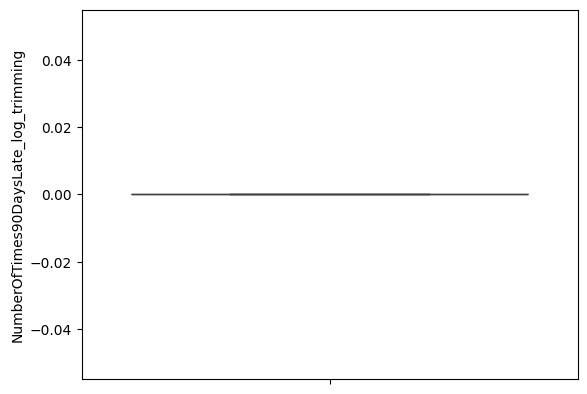

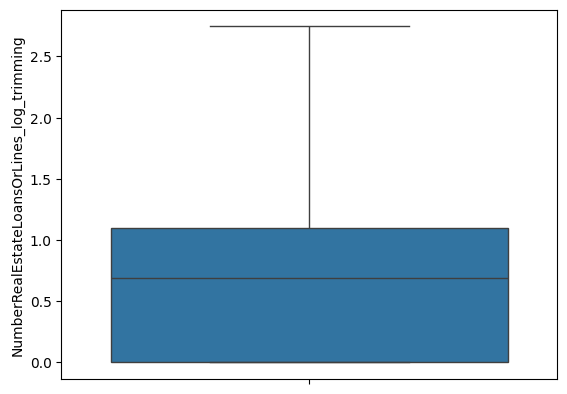

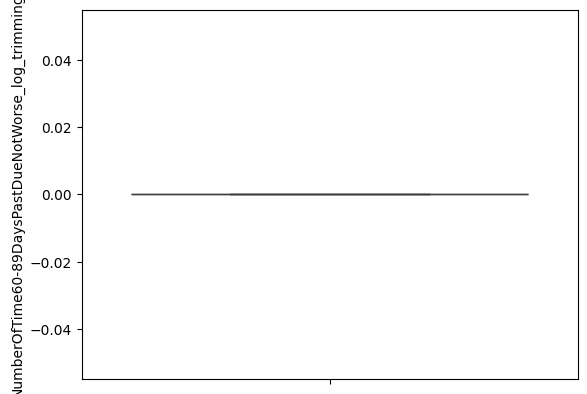

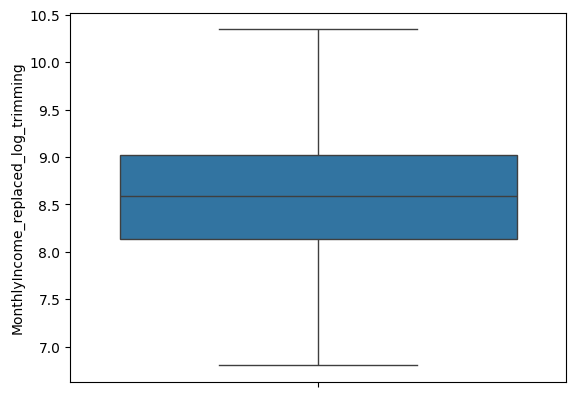

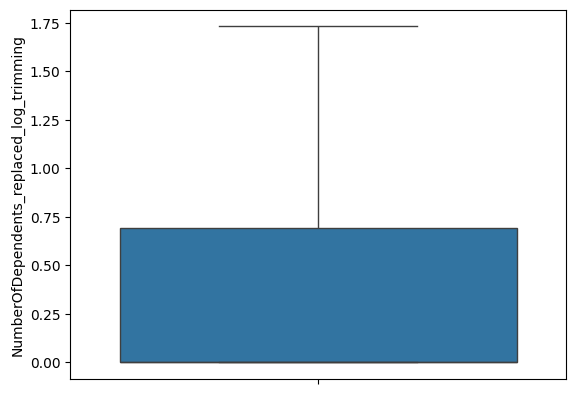

In [105]:
for i in x_train_num_cols.columns:
  sns.boxplot(x_train_num_cols[i])
  plt.show()

In [106]:
x_train_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [107]:
x_test_num_cols.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming'],
      dtype='object')

In [108]:
x_train_num_cols.reset_index(drop=True,inplace=True)

In [109]:
#join the data as it is:
#x_train_num_cols, x_train_cat_cols need to join and also x_test_num_cols,x_test_cat_cols are need to join
x_train_cleaned = pd.DataFrame()
x_train_cleaned = pd.concat([x_train_num_cols,x_train_cat_cols],axis=1)
x_train_cleaned.head(7)


,NPA Status_log_trimming,RevolvingUtilizationOfUnsecuredLines_log_trimming,age_log_trimming,NumberOfTime30-59DaysPastDueNotWorse_log_trimming,DebtRatio_log_trimming,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberOfTimes90DaysLate_log_trimming,NumberRealEstateLoansOrLines_log_trimming,NumberOfTime60-89DaysPastDueNotWorse_log_trimming,MonthlyIncome_replaced_log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.459287,3.688879,0.0,1.320412,1.386294,0.0,0.000000,0.0,9.023288,...,0,1,0,0,0,0,1,1.0,4.0,4.0
1,0.0,0.411962,4.189655,0.0,0.250661,1.791759,0.0,0.000000,0.0,8.026497,...,1,0,0,1,0,0,0,1.0,1.0,3.0
2,0.0,0.134501,4.025352,0.0,0.394841,2.833213,0.0,1.386294,0.0,9.669915,...,0,1,0,0,0,1,0,0.0,4.0,4.0
3,0.0,0.539652,3.784190,0.0,0.126901,2.484907,0.0,0.000000,0.0,8.679822,...,0,1,0,1,0,0,0,0.0,3.0,4.0
4,0.0,0.000000,3.912023,0.0,1.320412,3.091042,0.0,1.098612,0.0,9.004300,...,0,1,0,0,1,0,0,0.0,4.0,3.0
5,0.0,0.051363,3.332205,0.0,1.320412,2.197225,0.0,1.098612,0.0,8.843759,...,0,1,0,0,1,0,0,1.0,0.0,0.0
6,0.0,0.001446,3.931826,0.0,0.458924,2.197225,0.0,1.098612,0.0,8.891787,...,0,1,1,0,0,0,0,0.0,4.0,4.0


In [110]:
x_train_cleaned.shape

(135000, 21)

In [111]:
#Final test_data
x_test_num_cols.reset_index(drop=True,inplace=True)
x_test_cleaned = pd.DataFrame()
x_test_cleaned = pd.concat([x_test_num_cols,x_test_cat_cols],axis=1)
x_test_cleaned.head(7)

,NPA Status_log_trimming,RevolvingUtilizationOfUnsecuredLines_log_trimming,age_log_trimming,NumberOfTime30-59DaysPastDueNotWorse_log_trimming,DebtRatio_log_trimming,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberOfTimes90DaysLate_log_trimming,NumberRealEstateLoansOrLines_log_trimming,NumberOfTime60-89DaysPastDueNotWorse_log_trimming,MonthlyIncome_replaced_log_trimming,...,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
0,0.0,0.693147,3.433987,0.0,1.319470,0.752039,0.0,0.000000,0.0,8.944811,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
1,0.0,0.000000,4.060443,0.0,0.133273,2.302585,0.0,0.693147,0.0,8.955577,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
2,0.0,0.035916,3.891820,0.0,0.212118,1.945910,0.0,1.098612,0.0,8.699681,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0.0,0.702271,3.737670,0.0,0.151121,1.609438,0.0,0.000000,0.0,8.508959,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
4,0.0,0.697537,3.912023,0.0,1.319470,2.397895,0.0,0.693147,0.0,8.920122,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0
5,0.0,0.003225,4.382027,0.0,1.319470,1.945910,0.0,0.000000,0.0,8.151045,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.117320,3.891820,0.0,0.476775,2.708050,0.0,1.098612,0.0,9.524202,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0


In [112]:
x_test_cleaned.shape

(15000, 21)

In [113]:
x_test_cleaned.shape

(15000, 21)

In [114]:
# checking the columns names are matched are not 
c1=[]
for i ,j in enumerate(x_train_cleaned.columns):
  if x_test_cleaned.columns[i]==j:
    pass
  else:
    c1.append(i)
print(c1)

[]


In [115]:
x_train_cleaned.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [116]:
x_test_cleaned.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [117]:
x_test_cleaned.shape

(15000, 21)

In [118]:
x_train_cleaned.shape

(135000, 21)

# feature selection 
* feature means column

* why feature-selection is important ? 

Machine Learning will not work with the N number of dimensions , sometimes it works but it won't give better outcomes.
feature selection can be done in mainly 2 techniques

* filter method

* correlation

* hypothesis testing

* in filter methods two techniques is there

* constant *

* quasi constant technique

for finding correlation two techniques two techniques is there

* pearson
* spearman rank

In [119]:
# we are using first constant technique --> if is there any column whose varience is completely '0' that col will be removed 
vt=VarianceThreshold(threshold=0)
vt.fit(x_train_cleaned)

VarianceThreshold(threshold=0)

In [120]:
# to know which cols are important 
vt.get_support()

array([False,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [121]:
sum(vt.get_support())

17

In [122]:
x_train_cleaned.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [123]:
x_train_cleaned.columns[vt.get_support()] # to see good columns 

Index(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [124]:
x_train_cleaned.columns[~vt.get_support()] # to see useless columns 

Index(['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],
      dtype='object')

In [125]:
x_test_cleaned.columns

Index(['NPA Status_log_trimming',
       'RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [126]:
x_train_cleaned=x_train_cleaned.drop(columns=['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],axis=1)
x_test_cleaned = x_test_cleaned.drop(['NPA Status_log_trimming',
       'NumberOfTime30-59DaysPastDueNotWorse_log_trimming',
       'NumberOfTimes90DaysLate_log_trimming',
       'NumberOfTime60-89DaysPastDueNotWorse_log_trimming'],axis =1)

In [127]:
len(x_train_cleaned.columns )

17

In [128]:
x_test_cleaned.shape

(15000, 17)

* quasi state  --->  which column have variance is 0.1 that column will be removed 

In [129]:
vt1=VarianceThreshold(threshold=0.1)
vt1.fit(x_train_cleaned)

VarianceThreshold(threshold=0.1)

In [130]:
vt1.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [131]:
sum(vt1.get_support())# --> to see use cols count

15

In [132]:
x_train_cleaned.columns[vt1.get_support()]

Index(['DebtRatio_log_trimming',
       'NumberOfOpenCreditLinesAndLoans_log_trimming',
       'NumberRealEstateLoansOrLines_log_trimming',
       'MonthlyIncome_replaced_log_trimming',
       'NumberOfDependents_replaced_log_trimming', 'Gender_Female',
       'Gender_Male', 'Region_Central', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse', 'Occupation',
       'Education'],
      dtype='object')

In [133]:
x_train_cleaned.columns[~vt1.get_support()]

Index(['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'], dtype='object')

In [134]:
x_train_cleaned=x_train_cleaned.drop(columns=['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'],axis=1)
x_test_cleaned=x_test_cleaned.drop(columns=['RevolvingUtilizationOfUnsecuredLines_log_trimming', 'age_log_trimming'],axis=1)

In [135]:
x_train_cleaned.shape

(135000, 15)

In [136]:
x_test_cleaned.shape

(15000, 15)

# Hypothesis testing 
it works with the assumptions and proofs

if both the cols are numerical cols then use correlation

if p value < 0.05 ,

null hypothesis h0 will be rejected

alternate hypothesis h1 will be selected

if p value > 0.05 , null hypothesis - will be selected

In [137]:
#hypothesis testing correlation[pearson-correlation]
y_train

135986    Good
48361     Good
146561    Good
57742     Good
43651     Good
          ... 
119879    Good
103694    Good
131932    Good
146867    Good
121958    Good
Name: Good_Bad, Length: 135000, dtype: object

In [138]:
ln=LabelEncoder()
ln.fit(y_train)
print(ln.classes_)
f=ln.transform(y_train)
y_train_n=pd.DataFrame(data=f , columns=['target'])

['Bad' 'Good']


In [139]:
y_train_n.value_counts()

target
1         125935
0           9065
Name: count, dtype: int64

In [140]:
ln.classes_

array(['Bad', 'Good'], dtype=object)

In [141]:
y_test_n=pd.DataFrame(data=ln.transform(y_test),columns=['target'])

In [142]:
y_test_n.value_counts()

target
1         14039
0           961
Name: count, dtype: int64

In [143]:
co=[]
for i in x_train_cleaned.columns:
  s = pearsonr(x_train_cleaned[i],y_train_n['target'])
  co.append(s)
co = np.array(co)
co

array([[-2.77387698e-03,  3.08117517e-01],
       [ 5.31930632e-02,  3.52330620e-85],
       [ 3.03772236e-02,  6.13291349e-29],
       [ 4.49011212e-02,  3.32752062e-61],
       [-4.48391733e-02,  4.85299943e-61],
       [ 4.20244543e-03,  1.22571480e-01],
       [-4.20244543e-03,  1.22571480e-01],
       [ 1.58105363e-01,  0.00000000e+00],
       [ 5.08703457e-02,  4.68890954e-78],
       [-2.30943778e-02,  2.13009730e-17],
       [ 2.53738610e-04,  9.25721909e-01],
       [-2.05015130e-01,  0.00000000e+00],
       [-4.40387195e-03,  1.05645630e-01],
       [-1.02077928e-03,  7.07619652e-01],
       [ 3.41408808e-02,  4.09213501e-36]])

In [144]:
p_value = pd.Series(co[:,-1],index = x_train_cleaned.columns)
p_value

DebtRatio_log_trimming                          3.081175e-01
NumberOfOpenCreditLinesAndLoans_log_trimming    3.523306e-85
NumberRealEstateLoansOrLines_log_trimming       6.132913e-29
MonthlyIncome_replaced_log_trimming             3.327521e-61
NumberOfDependents_replaced_log_trimming        4.852999e-61
Gender_Female                                   1.225715e-01
Gender_Male                                     1.225715e-01
Region_Central                                  0.000000e+00
Region_East                                     4.688910e-78
Region_North                                    2.130097e-17
Region_South                                    9.257219e-01
Region_West                                     0.000000e+00
Rented_OwnHouse                                 1.056456e-01
Occupation                                      7.076197e-01
Education                                       4.092135e-36
dtype: float64

* if the correlation is <0.05 we dont removing them if any column correlation >0.05 we have to remove them becuse the realtion high thats we have to remove them we have only less than 0.05 columns only


In [ ]:
#to know values > 0.05
k = []
g = list(p_value)
for i in p_value:
  if i>0.05:
    k.append(g.index(i))
print(k)

[0, 5, 5, 10, 12, 13]


<Axes: >

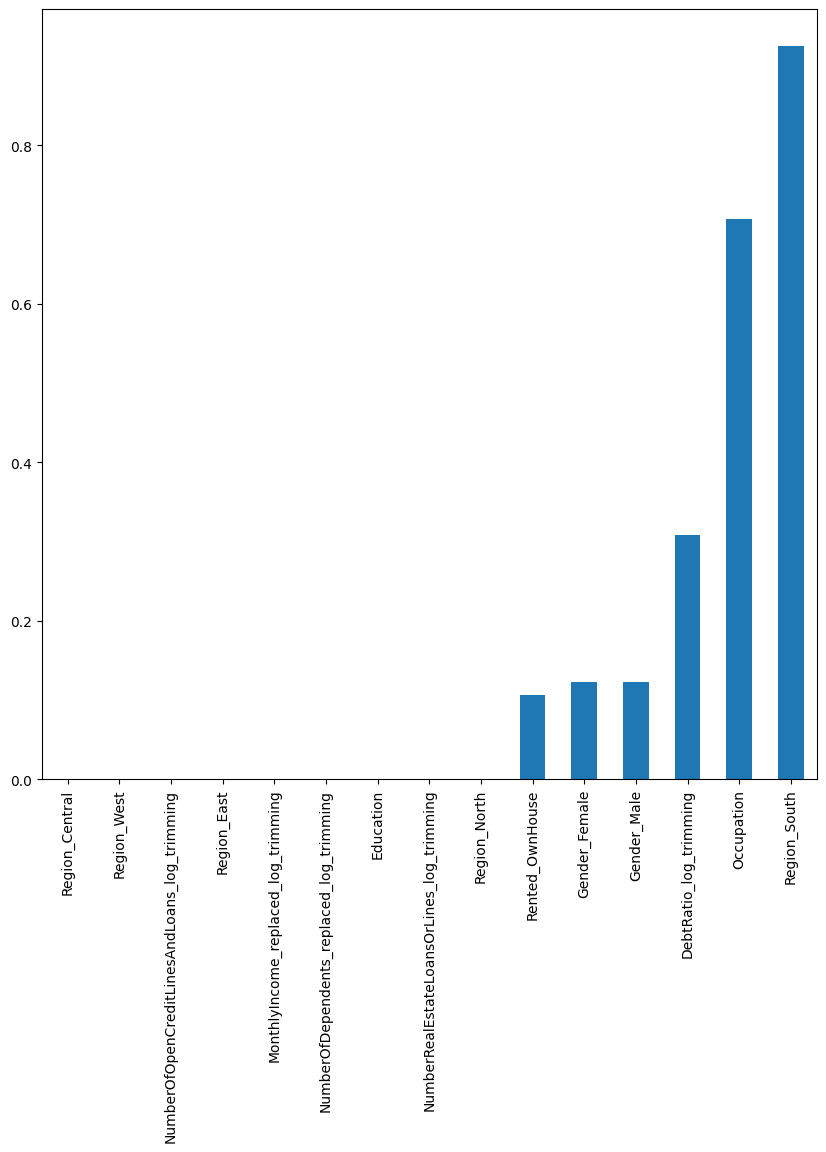

In [146]:
plt.figure(figsize=(10,10))
p_value.sort_values(ascending = True).plot.bar()

In [147]:
X_train_cleaned = x_train_cleaned.drop(columns=['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)

X_test_cleaned = x_test_cleaned.drop(columns=['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)

In [148]:
#after completing feature selection final data
x_train_cleaned.sample(10)

,DebtRatio_log_trimming,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberRealEstateLoansOrLines_log_trimming,MonthlyIncome_replaced_log_trimming,NumberOfDependents_replaced_log_trimming,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse,Occupation,Education
68532,0.390556,2.397895,1.609438,8.922792,0.000000,0,1,0,0,1,0,0,0.0,4.0,3.0
35512,0.213188,2.302585,0.000000,8.098947,0.693147,0,1,1,0,0,0,0,1.0,3.0,4.0
45397,0.150873,1.791759,0.000000,7.783641,0.693147,0,1,1,0,0,0,0,0.0,4.0,4.0
131288,0.030382,1.098612,0.000000,7.349874,0.000000,0,1,0,0,0,0,1,1.0,3.0,4.0
133582,0.003879,1.791759,0.000000,7.496097,0.000000,0,1,1,0,0,0,0,1.0,0.0,0.0
78105,1.320412,1.609438,0.000000,7.560601,0.000000,1,0,0,0,0,1,0,0.0,4.0,1.0
48360,0.208136,2.564949,0.693147,8.962007,1.098612,0,1,1,0,0,0,0,1.0,2.0,4.0
25354,1.031599,2.564949,1.791759,8.294300,0.000000,1,0,1,0,0,0,0,0.0,0.0,4.0
48586,0.445446,1.791759,0.000000,7.972811,1.098612,0,1,0,0,0,1,0,0.0,0.0,4.0
15046,1.320412,2.397895,0.693147,9.192278,1.098612,0,1,0,0,0,1,0,0.0,4.0,1.0


In [149]:
x_train_cleaned.shape


(135000, 15)

In [150]:
x_train_cleaned = x_train_cleaned.drop(columns=['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)


In [151]:
x_train_cleaned.shape

(135000, 9)

In [152]:
x_test_cleaned = x_test_cleaned.drop(columns=['Rented_OwnHouse','Gender_Female','Gender_Male','DebtRatio_log_trimming','Occupation','Region_South'],axis=1)

In [153]:
x_test_cleaned.shape

(15000, 9)

# Data Balancing Balancing the data

To overcome this issue we have 2 ways

Upsampling

Downsampling 

- don't use this downsampling, because we are going to loose the data.

In [154]:
#Upsampling - for balancing use upsampling
#downsampling will losing the data so don't prefer
#by k- means custering ,taking centroid near by values
#values increase by the centroid, no duplicates present while adding

In [155]:

y_train.shape

(135000,)

In [156]:
y_test.shape

(15000,)

In [157]:
x_test_cleaned.shape

(15000, 9)

In [158]:
x_train_cleaned.shape

(135000, 9)

In [159]:
y_train_n.value_counts()

target
1         125935
0           9065
Name: count, dtype: int64

In [160]:
y_train_n=np.array(y_train_n).ravel()
y_train_n

array([1, 1, 1, ..., 1, 1, 1])

In [161]:
y_test_n=np.array(y_test_n).ravel()
y_test_n

array([1, 1, 1, ..., 1, 1, 1])

In [162]:
# using upsampling we are going to balance data
! pip install imblearn 

Defaulting to user installation because normal site-packages is not writeable


# Upsampling the Data

In [163]:
print("before upsampling Bad 0 = {}".format(sum(y_train_n == 0)))
print("before upsamplingBad 1 = {}".format(sum(y_train_n == 1)))

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_train_up,y_train_up=sm.fit_resample(x_train_cleaned,y_train_n)

print("before upsampling Bad 0 = {}".format(sum(y_train_up == 0)))
print("before upsamplingBad 1 = {}".format(sum(y_train_up == 1)))


before upsampling Bad 0 = 9065
before upsamplingBad 1 = 125935
before upsampling Bad 0 = 125935
before upsamplingBad 1 = 125935


In [164]:
x_train_cleaned.shape

(135000, 9)

In [165]:
x_test_cleaned.shape

(15000, 9)

In [166]:
x_train_up.shape

(251870, 9)

In [167]:
y_test_n

array([1, 1, 1, ..., 1, 1, 1])

In [168]:
y_train_up.shape

(251870,)

# since the data is balanced we need to work on MODEL DEVELOPMENT

In [319]:
from sklearn.metrics import classification_report

In [320]:
def logi_alg(x,x_,y,y_):
  print(x.shape)
  print(y.shape)
  logi=LogisticRegression()
  logi.fit(x,y)
  y_pred=logi.predict(x_)
  print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
  print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
  print(f'Classification Report : {classification_report(y_,y_pred)}')

In [321]:
def knn_alg(x,x_,y,y_):
  print(x.shape)
  print(y.shape)
  knn=KNeighborsClassifier(n_neighbors=3)
  knn.fit(x,y)
  y_pred=knn.predict(x_)
  print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
  print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
  print(f'Classification Report : {classification_report(y_,y_pred)}')

In [322]:
def dt_alg(x,x_,y,y_):
  print(x.shape)
  print(y.shape)
  dt=DecisionTreeClassifier()
  dt.fit(x,y)
  y_pred=dt.predict(x_)
  print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
  print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
  print(f'Classification Report : {classification_report(y_,y_pred)}')

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB  # For discrete data


In [324]:
# def rnf_alg(x,x_,y,y_):
#   print(x.shape)
#   print(y.shape)
#   rnf=RandomForestClassifier()
#   rnf.fit(x,y)
#   y_pred=rnf.predict(x_)
#   print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
#   print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
#   print(f'Classification Report : {classification_report(y_,y_pred)}')

In [325]:
# def svm_alg(x,x_,y,y_):
#   print(x.shape)
#   print(y.shape)
#   svc=SVC()
#   svc.fit(x,y)
#   y_pred=svc.predict(x_)
#   print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
#   print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
#   print(f'Classification Report : {classification_report(y_,y_pred)}')

In [326]:
# def xg_alg(x,x_,y,y_):
#   print(x.shape)
#   print(y.shape)
#   xg=XGBClassifier()
#   xg.fit(x,y)
#   y_pred=xg.predict(x_)
#   print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
#   print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
#   print(f'Classification Report : {classification_report(y_,y_pred)}')

In [327]:
def nv_alg(x,x_,y,y_):
  print(x.shape)
  print(y.shape)
  nv=MultinomialNB()
  nv.fit(x,y)
  y_pred=nv.predict(x_)
  print(f'accuracy_score : {accuracy_score(y_,y_pred)}')
  print(f'confusion matrix : {confusion_matrix(y_,y_pred)}')
  print(f'Classification Report : {classification_report(y_,y_pred)}')

In [328]:
def calling_fun(x,x_,y,y_):
  print("-------------------------logistic-------------------------------")
  logi_alg(x,x_,y,y_)
  print("-------------------------knn-------------------------------")
  knn_alg(x,x_,y,y_)
  print("-------------------------decision-------------------------------")
  dt_alg(x,x_,y,y_)
  #print("-------------------------random forest-------------------------------")
  # # rnf_alg(x,x_,y,y_)
  # print("-------------------------svm-------------------------------")
  # svm_alg(x,x_,y,y_)
  # print("-------------------------xgboost-------------------------------")
  # xg_alg(x,x_,y,y_)
  print("-------------------------navie bayes-------------------------------")
  nv_alg(x,x_,y,y_)

In [329]:
calling_fun(x_train_up,x_test_cleaned,y_train_up,y_test_n)

-------------------------logistic-------------------------------
(251870, 9)
(251870,)
accuracy_score : 0.6723333333333333
confusion matrix : [[ 763  198]
 [4717 9322]]
Classification Report :               precision    recall  f1-score   support

           0       0.14      0.79      0.24       961
           1       0.98      0.66      0.79     14039

    accuracy                           0.67     15000
   macro avg       0.56      0.73      0.51     15000
weighted avg       0.93      0.67      0.76     15000

-------------------------knn-------------------------------
(251870, 9)
(251870,)
accuracy_score : 0.8312
confusion matrix : [[  451   510]
 [ 2022 12017]]
Classification Report :               precision    recall  f1-score   support

           0       0.18      0.47      0.26       961
           1       0.96      0.86      0.90     14039

    accuracy                           0.83     15000
   macro avg       0.57      0.66      0.58     15000
weighted avg       0.91     

In [295]:
# i want to find best value 
k_values=np.arange(3,20,2)
k_values

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [296]:
test_accuracy = []
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_up,y_train_up)
  test_accuracy.append(knn.score(X_test_cleaned,y_test_n))
test_accuracy

[0.8312,
 0.8154,
 0.8,
 0.7886666666666666,
 0.7826,
 0.7768,
 0.7716,
 0.7661333333333333,
 0.764]

In [318]:
nv = MultinomialNB()
nv.fit(x_train_up,y_train_up)
n=(nv.score(x_train_up,y_train_up))


0.7048159764958113

In [343]:
#knn
knn_algo = KNeighborsClassifier()
knn_algo.fit(x_train_up,y_train_up)
knn_pred = knn_algo.predict(X_test_cleaned)

In [344]:
#logistic regression
lr_algo = LogisticRegression()
lr_algo.fit(x_train_up,y_train_up)
lr_pred = lr_algo.predict(X_test_cleaned)

In [345]:
#naive bayes
nb_algo = GaussianNB()
nb_algo.fit(x_train_up,y_train_up)
nb_pred = nb_algo.predict(X_test_cleaned)

In [346]:
#decision tree
dt_algo = DecisionTreeClassifier()
dt_algo.fit(x_train_up,y_train_up)
dt_pred = dt_algo.predict(X_test_cleaned)

In [347]:
#give the model outcomes to auc and roc curves

#knn
fpr_knn,tpr_knn,threshold = roc_curve(y_test_n,knn_pred)
#lr
fpr_lr,tpr_lr,threshold = roc_curve(y_test_n,lr_pred)
#nb
fpr_nb,tpr_nb,threshold = roc_curve(y_test_n,nb_pred)
#dt
fpr_dt,tpr_dt,threshold = roc_curve(y_test_n,dt_pred)

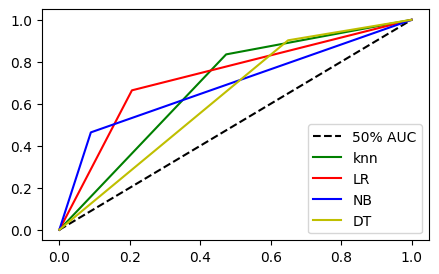

In [348]:
plt.figure(figsize = (5,3))
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr_knn,tpr_knn,color='g',label='knn')
plt.plot(fpr_lr,tpr_lr,color='r',label='LR')
plt.plot(fpr_nb,tpr_nb,color='b',label='NB')
plt.plot(fpr_dt,tpr_dt,color='y',label='DT')
plt.legend(loc=0)
plt.show()

In [349]:
if lr_algo.predict([[4.2,3,1200,2,0,0,1,0,1]])[0]==1:
  print('good customer')
else:
  print('bad cutomer')

good customer


In [355]:
x_train_up.head(2)

,NumberOfOpenCreditLinesAndLoans_log_trimming,NumberRealEstateLoansOrLines_log_trimming,MonthlyIncome_replaced_log_trimming,NumberOfDependents_replaced_log_trimming,Region_Central,Region_East,Region_North,Region_West,Education
0,1.386294,0.0,9.023288,0.0,0,0,0,1,4.0
1,1.791759,0.0,8.026497,0.0,0,1,0,0,3.0


In [353]:
y_train_up

array([1, 1, 1, ..., 0, 0, 0])

In [356]:
if lr_algo.predict([[1.386294,	0.0,	9.023288	,0.0,	0,	0	,0	,1,	4.0]])[0]==1:
  print('good customer')
else:
  print('bad cutomer')

bad cutomer


NumberOfOpenCreditLinesAndLoans_log_trimming
NumberRealEstateLoansOrLines_log_trimming
MonthlyIncome_replaced_log_trimming
NumberOfDependents_replaced_log_trimming
Region_Central
Region_East
Region_North
Region_West
Education


135000

In [368]:
from sklearn.metrics import confusion_matrix

In [370]:
#logistic regression
lr_algo = LogisticRegression()
lr_algo.fit(x_train_up,y_train_up)
lr_pred = lr_algo.predict(x_train_up)
con=confusion_matrix(y_train_up,lr_pred)
con

array([[99324, 26611],
       [42811, 83124]], dtype=int64)